In [3]:
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, f1_score
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, naive_bayes, svm
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, precision_recall_curve, average_precision_score
)
import matplotlib.pyplot as plt


In [4]:
def load_dataset(file_name, target_column):
    df=pd.read_csv(file_name)
    print(df.shape)
    TRAINING_FEATURES = df.columns[(df.columns != target_column) & (df.columns!='SKU')& (df.columns!='Item Name')]

    X = df[TRAINING_FEATURES]
    y = df[target_column]
    return X, y

file_name='../EDA/SheinData.csv'
X,y=load_dataset(file_name, 'Classification')

(13796, 27)


In [5]:
#split the data to train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [6]:
#logistic regration model

#fit(train)
def train_by_logistic(X_train, y_train):
    trained_LogisticRegression=LogisticRegression(max_iter=10000,solver="lbfgs")
    trained_LogisticRegression.fit(X_train, y_train)
    return trained_LogisticRegression

logistic_model=train_by_logistic(X_train, y_train)

#predict
def predict_by_logistic(trained_2nd_model, X_test):
    predicted_vals=trained_2nd_model.predict(X_test)
    return predicted_vals

predict_model=predict_by_logistic(logistic_model, X_test)

#evaluate
def evaluate_performance_by_logistic(y_test,y_predicted):
    evaluate_value=f1_score(y_test, y_predicted)
    return evaluate_value

print(evaluate_performance_by_logistic(y_test,predict_model))

0.9495638983693591


              precision    recall  f1-score   support

           0      0.926     0.982     0.953      1400
           1      0.980     0.919     0.949      1360

    accuracy                          0.951      2760
   macro avg      0.953     0.951     0.951      2760
weighted avg      0.953     0.951     0.951      2760



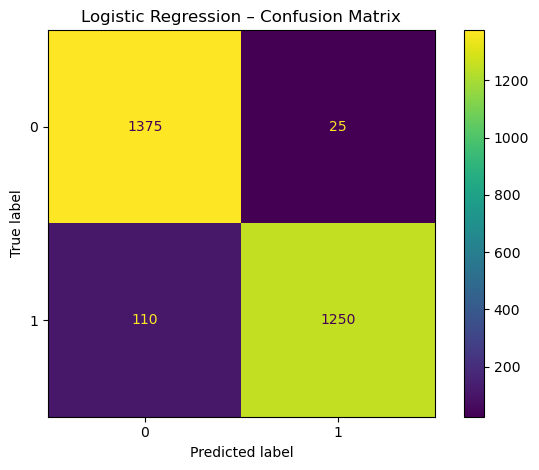

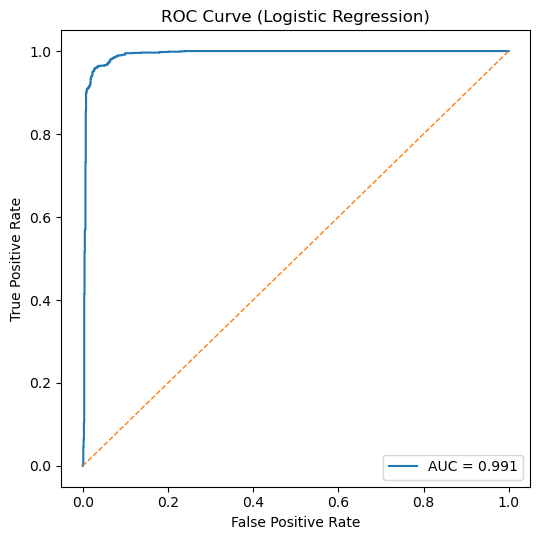

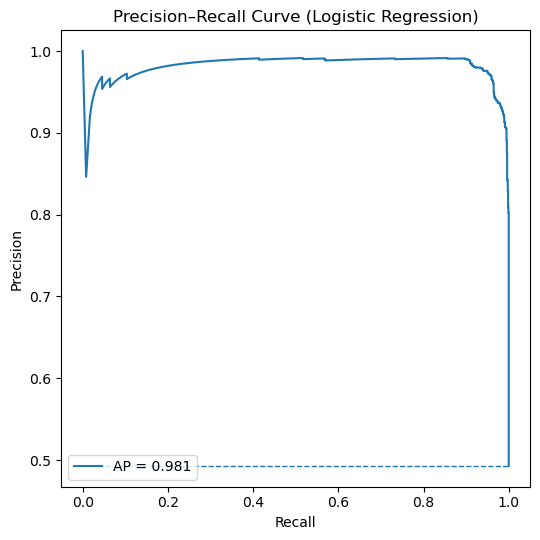

In [7]:

# 1) Train with scaling (and optional class_weight if לא מאוזן)
clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=10000, solver="lbfgs", class_weight='balanced')  # הסירי class_weight אם לא צריך
)
clf.fit(X_train, y_train)

# 2) Predictions (labels + probabilities)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

# 3) Classification report
print(classification_report(y_test, y_pred, digits=3))

# 4) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d")
plt.title("Logistic Regression – Confusion Matrix")
plt.tight_layout()
plt.show()

# 5) ROC curve + AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5.5,5.5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 6) Precision–Recall + AP (PR-AUC)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.figure(figsize=(5.5,5.5))
plt.plot(recall, precision, label=f"AP = {ap:.3f}")
plt.hlines(y_test.mean(), 0, 1, linestyles="--", lw=1)  # baseline=positive rate
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Logistic Regression)")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()
